In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

#load the dataset
df=pd.read_csv('/content/creditcard_frauddetection.csv')
#print info about columns in the dataframe
df.info()
df=df.reset_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.head()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


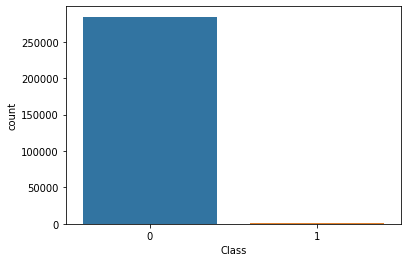

In [ ]:
import seaborn as sns
sns.countplot(x='Class',data=df)   #target column name and dataframe 

In [ ]:
#creating a dataframe with all the fraud transactions
fraud_cards=df[df['Class']==1]      #get all rows  having fraud transaction
fraud_cards['Amount'].describe().round(2)

count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64

In [ ]:
#normalize the amount column
sc=StandardScaler()
amount=df['Amount'].values
df['normAmount']=sc.fit_transform(amount.reshape(-1,1))
#drop time and amount columns as they are not relevant for prediction purposes
df=df.drop(['Time'],axis=1)
df=df.drop(['Amount'],axis=1)
df['Class'].value_counts() #there are 492 fraud transactions

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
X=df.drop('Class',axis=1)
y=df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
#split into 70:30 ratio
X_train, X_test , y_train , y_test = train_test_split(X,y, test_size=0.3, random_state=0)
#describes info about train and test set
print("Number of transactions of X_train dataset:", X_train.shape)
print("Number of transactions of y_train dataset:", y_train.shape)
print("Number of transactions of X_test dataset:", X_test.shape)
print("Number of transactions of y_test dataset:", y_test.shape)

Number of transactions of X_train dataset: (199364, 30)
Number of transactions of y_train dataset: (199364,)
Number of transactions of X_test dataset: (85443, 30)
Number of transactions of y_test dataset: (85443,)


In [ ]:
#training without imbalance consideration

#logistic regression object
lr=LogisticRegression()
#train the model on train set
lr.fit(X_train,y_train.ravel())
predictions = lr.predict(X_test)
#print classification report
print(classification_report(y_test, predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.77      0.64      0.70       147

    accuracy                           1.00     85443
   macro avg       0.88      0.82      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#SMOTE

In [ ]:
pip install imblearn

In [ ]:
print('Before Oversampling, the shape of train_X: {}'.format(sum(y_train==0)))
print(sum(y_train==1))
#import SMOTE module from imblearn library
print(sum(y_train==0))
from  imblearn.over_sampling import SMOTE

sm= SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After Oversampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After Oversampling, the shape of train_X: {}'.format(y_train_res.shape))
print(sum(y_train_res==1))
print(sum(y_train_res==0))

Before Oversampling, the shape of train_X: 199019
345
199019
After Oversampling, the shape of train_X: (398038, 30)
After Oversampling, the shape of train_X: (398038,)
199019
199019


In [ ]:
lr1=LogisticRegression()
lr1.fit(X_train_res,y_train_res.ravel())
predictions = lr1.predict(X_test)

print(classification_report(y_test, predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.08      0.88      0.15       147

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.57     85443
weighted avg       1.00      0.98      0.99     85443



In [ ]:
#NearMiss algorithm
print('Before Undersampling, the shape of train_X: {}'.format(sum(y_train==0)))
print(sum(y_train==1))
#import SMOTE module from imblearn library
print(sum(y_train==0))
from  imblearn.under_sampling import NearMiss
nr= NearMiss()
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())

print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_X: {}'.format(y_train_miss.shape))
print(sum(y_train_miss==1))
print(sum(y_train_miss==0))

Before Undersampling, the shape of train_X: 199019
345
199019
After Undersampling, the shape of train_X: (690, 30)
After Undersampling, the shape of train_X: (690,)
345
345


In [ ]:
#train the model on train set
lr2=LogisticRegression()
lr2.fit(X_train_miss,y_train_miss.ravel())
predictions = lr2.predict(X_test)

#print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85296
           1       0.04      0.90      0.07       147

    accuracy                           0.96     85443
   macro avg       0.52      0.93      0.53     85443
weighted avg       1.00      0.96      0.98     85443



In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_res,y_train_res)
svm_yhat=svm.predict(X_test)

In [ ]:
svm=SVC(C= 1, kernel= 'linear', random_state= 0) 
svm.fit(X_train_res,y_train_res) 
svm_yhat=svm.predict(X_test) 
print(classification_report(y_test,svm_yhat))

In [ ]:
rf=RandomForestClassifier(max_depth=4) 
rf.fit(X_train_res,y_train_res) 
rf_yhat=rf.predict(X_test) 
print(classification_report(y_test,rf_yhat))

NameError: ignored

In [ ]:
xgb1=xgb.XGBClassifier(max_depth=4) 
xgb1.fit(X_train_res,y_train_res) 
xgb1_yhat=xgb1.predict(X_test) 
print(classification_report(y_test,xgb1_yhat))

In [ ]:
dc=DecisionTreeClassifier() 
dc.fit(X_train_res,y_train_res) 
dc_yhat=dc.predict(X_test) 
print(classification_report(y_test,dc_yhat))

we obtained the dataset.ploted some features and applied logestic regression on it.but as our dataset is baised the algorithm overfits on the data.so we use smart stratage called as SMOT to oversample the data and then again we fed the data into log reg and obtain the results.Apart from logestic regression we also use different alogorithms like decesion tree ,random forest,SVM,xgboost we observe that most accurate results are obtained in the case of SVM